In [ ]:
Random Forest Regressor
Gradient Boosting Regressor
Ridge Regression
Lasso Regression
Support Vector Regressor
Voting Regressor
Stacking Regressor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(r"C:\Users\super\Downloads\environmental_data_with_near_real_pm25.csv")

In [2]:
print(df.isnull().sum())

Country                                    0
PM2.5 Concentration (µg/m³)               48
CO2 Emissions (metric tons per capita)    31
Air Pollution Index                        0
Water Quality Index                        0
dtype: int64


In [3]:
initial_rows = len(df)
df = df.drop_duplicates()
print(f"Removed {initial_rows - len(df)} duplicate rows.")

Removed 0 duplicate rows.


In [4]:
for column in df.columns:
    if df[column].dtype == float:  
        df[column].fillna(df[column].mean(), inplace=True)


scaler = MinMaxScaler()
numerical_columns = ['PM2.5 Concentration (µg/m³)', 'CO2 Emissions (metric tons per capita)', 
                     'Air Pollution Index', 'Water Quality Index']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  
0             0.273399  
1             0.590675  
2             0.912466  
3             0.206865  
4             0.621461  


In [2]:
data = pd.read_csv("C:\\Users\\super\\Downloads\\cleaned_environmental_data.csv")
world_data = pd.read_csv("C:\\Users\\super\\Downloads\\world-data-2023_cleaned.csv")

In [3]:
columns_to_add = [
    'Country',  
    'Life expectancy',  
    'GDP', 
    'Out of pocket health expenditure',
    'Gross tertiary education enrollment (%)',
    'Population',
    'Urban_population'  
]

In [4]:
if 'Country' not in data.columns:
    data.rename(columns={df.columns[0]: 'Country'}, inplace=True)

if 'Country' in world_data.columns and 'Country' in data.columns:
    merged_data = pd.merge(data, world_data[columns_to_add], on='Country', how='inner')
    print(merged_data.head())
else:
    print("Country column is missing in one of the dataframes or incorrectly named.")

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  Life expectancy           GDP  \
0             0.273399        64.500000  1.910135e+10   
1             0.590675        78.500000  1.527808e+10   
2             0.912466        76.700000  1.699882e+11   
3             0.206865        72.279679  3.154058e+09   
4             0.621461        60.80

Life expectancy                            1.000000
Gross tertiary education enrollment (%)    0.714553
CO2 Emissions (metric tons per capita)     0.448901
GDP                                        0.175355
Air Pollution Index                        0.094701
Urban_population                           0.070007
Population                                 0.008409
Water Quality Index                        0.005960
Out of pocket health expenditure          -0.317561
PM2.5 Concentration (µg/m³)               -0.384366
Name: Life expectancy, dtype: float64


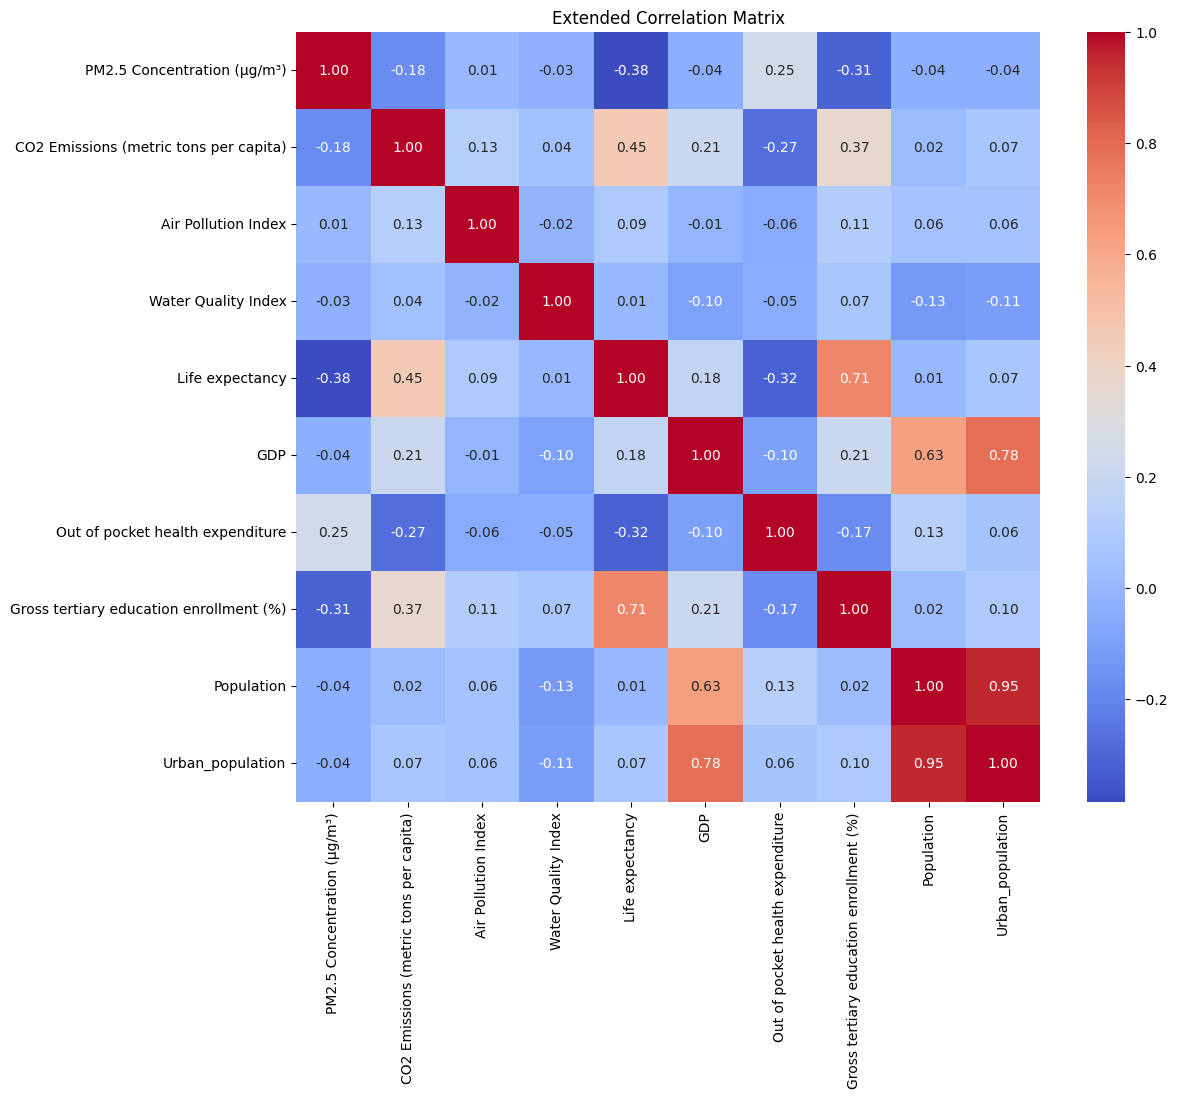

In [5]:
import seaborn as sns
numeric_data = merged_data.select_dtypes(include=[np.number])  
correlation_matrix = numeric_data.corr()
life_expectancy_correlation = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(life_expectancy_correlation)

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Extended Correlation Matrix')
plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = merged_data.drop(['Life expectancy', 'Country'], axis=1)
y = merged_data['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('extra_trees', ExtraTreesRegressor(n_estimators=100, random_state=42)),
    ('gradient_boost', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('elastic_net', ElasticNet()),
    ('svr', SVR(kernel='linear'))
]

# Initialize and train Voting and Stacking Regressors
voting_ensemble = VotingRegressor(estimators=base_models)
stack_model = StackingRegressor(estimators=base_models, final_estimator=GradientBoostingRegressor(), passthrough=True)

voting_ensemble.fit(X_train_scaled, y_train)
stack_model.fit(X_train_scaled, y_train)

y_pred_voting = voting_ensemble.predict(X_test_scaled)
y_pred_stack = stack_model.predict(X_test_scaled)

metrics = {
    "Voting RMSE": np.sqrt(mean_squared_error(y_test, y_pred_voting)),
    "Voting MAE": mean_absolute_error(y_test, y_pred_voting),
    "Voting R2": r2_score(y_test, y_pred_voting),
    "Stacking RMSE": np.sqrt(mean_squared_error(y_test, y_pred_stack)),
    "Stacking MAE": mean_absolute_error(y_test, y_pred_stack),
    "Stacking R2": r2_score(y_test, y_pred_stack)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_voting_mae = cross_val_score(voting_ensemble, X_train_scaled, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_scores_stack_mae = cross_val_score(stack_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_scores_voting_r2 = cross_val_score(voting_ensemble, X_train_scaled, y_train, cv=kf, scoring='r2')
cv_scores_stack_r2 = cross_val_score(stack_model, X_train_scaled, y_train, cv=kf, scoring='r2')

cv_scores_voting_rmse = cross_val_score(voting_ensemble, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_scores_stack_rmse = cross_val_score(stack_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

mean_cv_rmse_voting = np.sqrt(-np.mean(cv_scores_voting_rmse))
mean_cv_rmse_stack = np.sqrt(-np.mean(cv_scores_stack_rmse))
mean_cv_mae_voting = -np.mean(cv_scores_voting_mae)
mean_cv_r2_voting = np.mean(cv_scores_voting_r2)
mean_cv_mae_stack = -np.mean(cv_scores_stack_mae)
mean_cv_r2_stack = np.mean(cv_scores_stack_r2)

print("Metrics for Voting and Stacking Regressor:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.3f}")

print(f"Mean CV RMSE (Voting): {mean_cv_rmse_voting:.3f}")
print(f"Mean CV RMSE (Stacking): {mean_cv_rmse_stack:.3f}")
print(f"Mean CV MAE (Voting): {mean_cv_mae_voting:.3f}")
print(f"Mean CV R2 (Voting): {mean_cv_r2_voting:.3f}")
print(f"Mean CV MAE (Stacking): {mean_cv_mae_stack:.3f}")
print(f"Mean CV R2 (Stacking): {mean_cv_r2_stack:.3f}")

Metrics for Voting and Stacking Regressor:
Voting RMSE: 3.372
Voting MAE: 2.749
Voting R2: 0.744
Stacking RMSE: 3.939
Stacking MAE: 3.259
Stacking R2: 0.650
Mean CV RMSE (Voting): 4.682
Mean CV RMSE (Stacking): 5.089
Mean CV MAE (Voting): 3.542
Mean CV R2 (Voting): 0.598
Mean CV MAE (Stacking): 3.872
Mean CV R2 (Stacking): 0.512


In [7]:
y_pred_meta = stack_model.predict(X_test_scaled)

rmse_meta = np.sqrt(mean_squared_error(y_test, y_pred_meta))
print(f"Meta-Model RMSE: {rmse_meta}")

r2_meta = r2_score(y_test, y_pred_meta)
print(f"Meta-Model R2 Score: {r2_meta}")

Meta-Model RMSE: 3.9392825113151195
Meta-Model R2 Score: 0.650204549093208


C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.812e+01, tolerance: 3.055e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+02, tolerance: 2.041e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

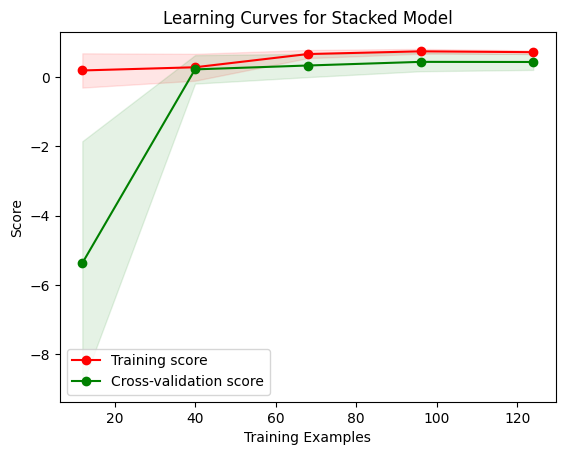

In [53]:
train_sizes, train_scores, test_scores = learning_curve(
    stack_model, X_train_scaled, y_train, cv=5, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves for Stacked Model")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

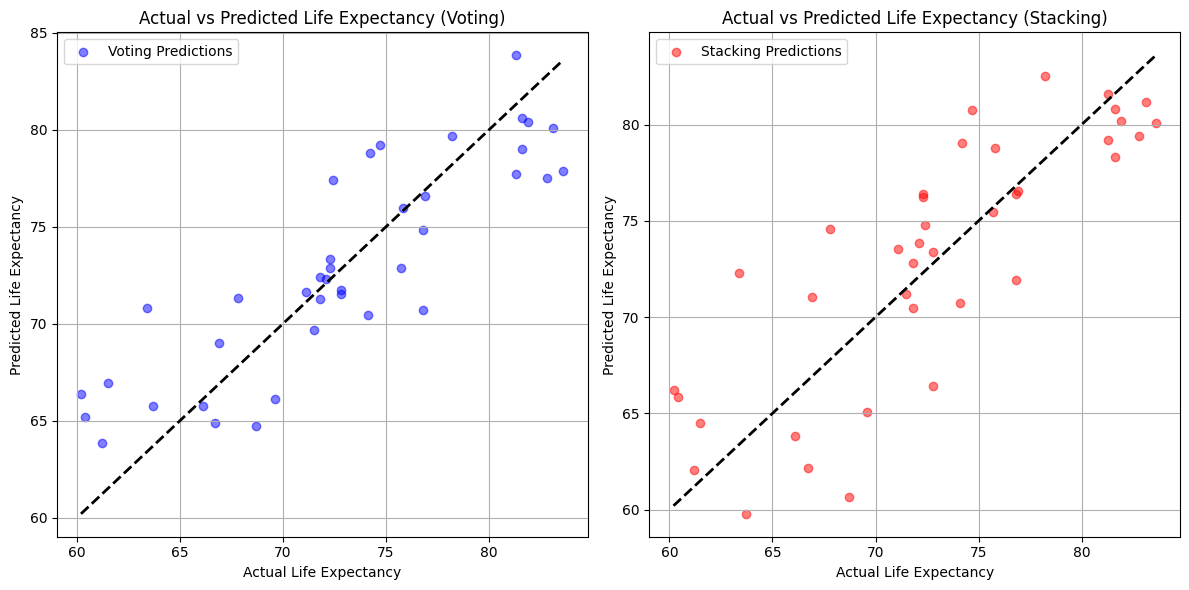

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_voting, color='blue', alpha=0.5, label='Voting Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Life Expectancy (Voting)')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_stack, color='red', alpha=0.5, label='Stacking Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Life Expectancy (Stacking)')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()